<a href="https://colab.research.google.com/github/SebastianLealT/OPTIMIZACION-1/blob/main/Programaci%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programación Lineal: Optimizando un problema de producción de postres
### Johan Sebastian Leal Toro
### Universidad del Valle- Cali
### Curso de Optimización I

En este cuaderno nos centraremos en optimizar un problema usando la programación lineal, para ello importamos los siguientes paquetes:

In [27]:
!pip install PuLP

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pulp

## Problema planteado

La empresa Los Michipostres dedicada a la producción y comercialización de postres emprende lanzado cuatro sabores distintos: maracuyá, limón, tres leches y café. Para la elaboración de cada sabor se agregan ingredientes diferentes a una ***mezcla base*** compuesta por:

* 2gr de Gelatina sin sabor.
* 128gr de galletas macarenas.
* 15g de mantequilla.
* 60ml de leche.
* 60ml de leche condensada.
* 60ml de crema de leche.

Ahora bien, los ingredientes usados para la elaboración de cada sabor son:

**Postre de Maracuyá:**
- 354gr de mezcla base
- 2 maracuyás.
- 1gr de gelatina sin sabor.

**Postre de Limón:**
- 325gr de mezcla base
- 2 limones.
- 40gr de chantilly.

**Postre de Tres leches:**
- 355gr de mezcla base
- 40gr de chantilly.
- 10gr de cobertura de leche.

**Postre de Café:**
- 377gr de mezcla base
- 13gr de café.
- 15gr de arequipe.

Los datos anteriormente mostrados son las cantidades para la elaboración de una sola unidad y adicional a cada unidad se le agrega el costo de un envase. Seguidamente, gracias a un estudio de mercado realizado se obtuvo la siguiente infromación:

1. Beneficio esperado por cada postre de los diferentes sabores:
> * Postre de Maracuyá: 2700
> * Postre de Limón: 2450
> * Postre de Tres Leches: 2750
> * Postre de Café: 2900

2. Disponibilidad semanal de las materias primas:
> * Mezcla base: 195kg
> * Gelatina sin sabor: 870gr
> * Chantilly: 32kg
> * Cobertura de leche: 3kg
> * Arequipe: 3kg
> * Maracuyá: 450
> * Limón: 520
> * Café: 2kg
> * Envases: 2000

3. Demanda esperada semanalmente para cada tipo de postre:
> * Maracuyá: 180 postres.
> * Limón y Tres leches: 450 postres.
> * No se tiene una demanda esperada para los postres de Café.


La información descrita, respecto a los ingredientes usados para cada postres, se puede resumir en la siguiente tabla:

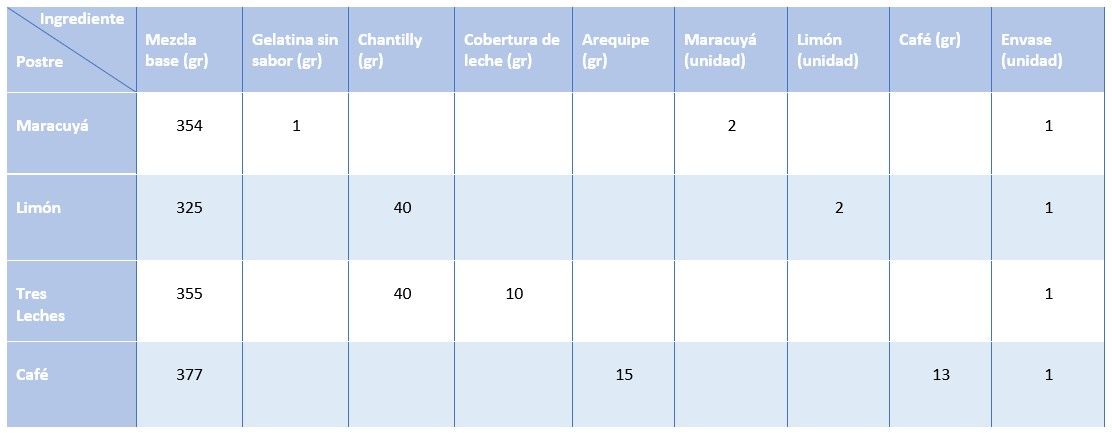

La empresa ha solicitado determinar el plan semanal de producción de los diferentes tipos de postres con el objetivo de maximizar beneficios. La optimización de este problema se desarrolla a continuación.

## Función objetivo

Dado que se quieren maximizar los beneficios, podemos defirnir nuestras variables de la siguiente manera:

$x_{1}$: Cantidad semanal de postres de maracuyá.\
$x_{2}$: Cantidad semanal de postres de limón.\
$x_{3}$: Cantidad semanal de postres de tres leches.\
$x_{4}$: Cantidad semanal de postres de café.

In [29]:
# Definimos la lista de los diferentes sabores de postres
postres = ['Postre de Maracuyá', 'Postre de Limón', 'Postre de Tres Leches', 'Postre de Café']

# Definimos la lista de valiables X_Ingrediente
variables = pulp.LpVariable.dicts("X",postres,0)

De la información suministrada por el ejercicio podemos definir el siguiente diccionario para los beneficios por cada postre:

In [30]:
beneficios = {'Postre de Maracuyá': 2700, 
         'Postre de Limón': 2450, 
         'Postre de Tres Leches': 2750, 
         'Postre de Café': 2900}

Definimos ahora nuestra función objetivo como la suma de los productos de los beneficios y cantidades de cada tipo de postre respectivamente, es decir, nuestra función objetivo será:

$$f(x)=2700x_{1}+2450x_{2}+2750x_{3}+2900x_{4}$$

Dado que esta requiere ser maximizada, es un problema equivalente minimizar $-f(x)$ y es lo que se hará en el programa.

In [31]:
#Definimos el problema y agregamos a este la función objetivo -f(x)
problema = pulp.LpProblem("Problema_Postres", pulp.LpMinimize)
problema += -pulp.lpSum([beneficios[i]*variables[i] for i in postres])
problema

Problema_Postres:
MINIMIZE
-2900*X_Postre_de_Café + -2450*X_Postre_de_Limón + -2700*X_Postre_de_Maracuyá + -2750*X_Postre_de_Tres_Leches + 0
VARIABLES
X_Postre_de_Café Continuous
X_Postre_de_Limón Continuous
X_Postre_de_Maracuyá Continuous
X_Postre_de_Tres_Leches Continuous

## Restricciones

Del estudio de mercado realizado se obtienen las siguientes restricciones:
1. Para la mezcla base:
$$354x_{1}+325x_{2}+355x_{3}+377x_{4}\leq 195000$$
2. Para la gelatina sin sabor:
$$x_{1}\leq 870$$
3. Para el chantilly:
$$40x_{2}+40x_{3}\leq 32000$$
4. Para la cobertura de leche:
$$10x_{3}\leq 3000$$
5. Para el arequipe:
$$15x_{4}\leq 3000$$
6. Para el maracuyá:
$$2x_{1}\leq 450$$
7. Para los limones:
$$2x_{2}\leq 520$$
8. Para el café:
$$13x_{4}\leq 2000$$
9. Para los envases:
$$x_{1}+x_{2}+x_{3}+x_{4}\leq 2000$$
10. Demanda de postre de maracuyá:
$$x_{1}\geq 180$$
11. Demanda de postres de limón y tres leches:
$$x_{2}+x_{3}\geq 450$$
12. No negatividad:
$$x_{1},x_{2},x_{3},x_{4}\geq 0$$

Para programar estas restricciones es necesario definir primero los diccionarios de las cantidades de cada ingrediente para cada postre, esto nos permitirá tener las listas de los coeficientes para cada restricción:

In [32]:
# Para la mezcla base
mbase = {'Postre de Maracuyá': 354, 
         'Postre de Limón': 325, 
         'Postre de Tres Leches': 355, 
         'Postre de Café': 377}

# Para la gelatina sin sabor
gelatina = {'Postre de Maracuyá': 1, 
         'Postre de Limón': 0, 
         'Postre de Tres Leches': 0, 
         'Postre de Café': 0}

# Para la chantilly
chantilly = {'Postre de Maracuyá': 0, 
         'Postre de Limón': 40, 
         'Postre de Tres Leches': 40, 
         'Postre de Café': 0}

# Para la cobertura de leche
cobertura = {'Postre de Maracuyá': 0, 
         'Postre de Limón': 0, 
         'Postre de Tres Leches': 10, 
         'Postre de Café': 0}

# Para el arequipe
arequipe = {'Postre de Maracuyá': 0, 
         'Postre de Limón': 0, 
         'Postre de Tres Leches': 0, 
         'Postre de Café': 15}

# Para el maracuyá
maracuya = {'Postre de Maracuyá': 2, 
         'Postre de Limón': 0, 
         'Postre de Tres Leches': 0, 
         'Postre de Café': 0}

# Para el limón
limon = {'Postre de Maracuyá': 0, 
         'Postre de Limón': 2, 
         'Postre de Tres Leches': 0, 
         'Postre de Café': 0}

# Para el café
cafe = {'Postre de Maracuyá': 0, 
         'Postre de Limón': 0, 
         'Postre de Tres Leches': 0, 
         'Postre de Café': 13}

# Para los envases
envase = {'Postre de Maracuyá': 1, 
         'Postre de Limón': 1, 
         'Postre de Tres Leches': 1, 
         'Postre de Café': 1}

# Demanda del postre de maracuyá
dMaracuya = {'Postre de Maracuyá': 1, 
         'Postre de Limón': 0, 
         'Postre de Tres Leches': 0, 
         'Postre de Café': 0}

# Demanda del postre de limón y de tres leches
dLimon = {'Postre de Maracuyá': 0, 
         'Postre de Limón': 1, 
         'Postre de Tres Leches': 1, 
         'Postre de Café': 0}

Habiendo definido los diccionarios, programamos cada restricción y la añadimos a nuestro problema:

In [33]:
problema += pulp.lpSum([mbase[i]*variables[i] for i in postres]) <= 195000, "R_MezclaBase"
problema += pulp.lpSum([gelatina[i]*variables[i] for i in postres]) <= 870, "R_Gelatina"
problema += pulp.lpSum([chantilly[i]*variables[i] for i in postres]) <= 32000, "R_Chantilly"
problema += pulp.lpSum([cobertura[i]*variables[i] for i in postres]) <= 3000, "R_Cobertura"
problema += pulp.lpSum([arequipe[i]*variables[i] for i in postres]) <= 3000, "R_Arequipe"
problema += pulp.lpSum([maracuya[i]*variables[i] for i in postres]) <= 450, "R_Maracuyá"
problema += pulp.lpSum([limon[i]*variables[i] for i in postres]) <= 520, "R_Limón"
problema += pulp.lpSum([cafe[i]*variables[i] for i in postres]) <= 2000, "R_Café"
problema += pulp.lpSum([envase[i]*variables[i] for i in postres]) <= 2000, "R_Envase"
problema += pulp.lpSum([dMaracuya[i]*variables[i] for i in postres]) >= 180, "R_DemandaMaracuya"
problema += pulp.lpSum([dLimon[i]*variables[i] for i in postres]) >=450, "R_DemandaLimón_TresLeches"

#Se muestra el problema de optimización
problema

Problema_Postres:
MINIMIZE
-2900*X_Postre_de_Café + -2450*X_Postre_de_Limón + -2700*X_Postre_de_Maracuyá + -2750*X_Postre_de_Tres_Leches + 0
SUBJECT TO
R_MezclaBase: 377 X_Postre_de_Café + 325 X_Postre_de_Limón
 + 354 X_Postre_de_Maracuyá + 355 X_Postre_de_Tres_Leches <= 195000

R_Gelatina: X_Postre_de_Maracuyá <= 870

R_Chantilly: 40 X_Postre_de_Limón + 40 X_Postre_de_Tres_Leches <= 32000

R_Cobertura: 10 X_Postre_de_Tres_Leches <= 3000

R_Arequipe: 15 X_Postre_de_Café <= 3000

R_Maracuyá: 2 X_Postre_de_Maracuyá <= 450

R_Limón: 2 X_Postre_de_Limón <= 520

R_Café: 13 X_Postre_de_Café <= 2000

R_Envase: X_Postre_de_Café + X_Postre_de_Limón + X_Postre_de_Maracuyá
 + X_Postre_de_Tres_Leches <= 2000

R_DemandaMaracuya: X_Postre_de_Maracuyá >= 180

R_DemandaLimón_TresLeches: X_Postre_de_Limón + X_Postre_de_Tres_Leches >= 450

VARIABLES
X_Postre_de_Café Continuous
X_Postre_de_Limón Continuous
X_Postre_de_Maracuyá Continuous
X_Postre_de_Tres_Leches Continuous

## Optimización del problema

In [44]:
# Se resuelve el problema descrito
problema.solve()

# Imprimimos el resultado del problema optimizado:
print('==========================================================')
print('||               **SOLUCIÓN DEL PROBLEMA**              ||')
print('==========================================================')
print("||  El estaus final de la solución es:", pulp.LpStatus[problema.status],'      ||')
print("||  El valor de la función objetivo es:", pulp.value(problema.objective),'     ||')
print('==========================================================')
print("||                 Reporte de variables                 ||")
print('==========================================================')
for v in problema.variables():
    print(v, "=", pulp.value(v))
print('==========================================================')



||               **SOLUCIÓN DEL PROBLEMA**              ||
||  El estaus final de la solución es: Infeasible       ||
||  El valor de la función objetivo es: -1645500.0      ||
||                 Reporte de variables                 ||
X_Postre_de_Café = 0.0
X_Postre_de_Limón = 260.0
X_Postre_de_Maracuyá = 180.0
X_Postre_de_Tres_Leches = 190.0


# Resultados y Conclusiones

El problema resulta ser inviable, esto se debe a que los datos obtenidos por el "estudio de mercado" para establecer las restricciones son tomados de una manera exagerada y sin ninguna certeza, pues el problema fue escrito de manera hipotética. En caso tal de que se realice un buen estudio de mercado el programa debería ejecutar de manera concisa el caso de optimización. Aún así el problema fue optimizado y se reportaron las variables que podrian "maximizar" los beneficios, en este caso generar menos pérdidas.

# Bibliografía y Referencias


1. Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.
2. Chong, E. K., & Zak, S. H. (2004). An introduction to optimization. John Wiley & Sons.